# ***1. Import Libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

# ***2. Import Data***

In [3]:
students_weights = pd.read_csv('C:\\Users\\a0008578\\Desktop\\Jupyter Notebooks\\Paired two samples t test (weights).csv') #Import data

# ***3. Data Wrangling***

## ***3.1. Explore shape of data frame***

In [4]:
pd.set_option('display.max_rows', 500) #Changes the default display setting and allows visualisation of all columns
print(students_weights)

    Student Number  Weight Before  Weight After
0             A011          88.24         60.02
1             A012          89.45         70.19
2             A013          96.73         71.20
3             A014          74.06         55.89
4             A015          82.61         65.52
5             A016          70.10         61.40
6             A017          78.98         76.71
7             A018            NaN        586.40
8             A019          75.65         51.14
9             A020          68.27         55.20
10            A021          86.00         64.41
11            A022          79.94         62.53
12            A023         101.95         66.80
13            A024          88.97         52.48
14            A025          91.79         66.76
15            A026          70.42         57.95
16            A027          97.23         67.72
17            A028          85.71         66.83
18            A029          82.99         61.40
19            A030          83.95       

In [5]:
students_weights.info() #Displays number of columns, non values in each column and type of variables in each column
students_weights.shape #Reports the maximum number of observations and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student Number  435 non-null    object 
 1   Weight Before   409 non-null    float64
 2   Weight After    422 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.3+ KB


(435, 3)

## ***3.2. Check for duplicates***

In [6]:
students_weights.duplicated('Student Number').sum() #Counts the number duplicates in the Student Number column

0

In [7]:
students_weights[students_weights.duplicated('Student Number')] #Displays whether or not duplicates were found for each observation in the Student Number column

,Student Number,Weight Before,Weight After


## ***3.3. Check for blanks***

In [8]:
students_weights.isna().sum(), students_weights.isna().sum().sum() 
#Counts the number of NULL values in each column, #Calculates the total number of NULL values in the dataframe

(Student Number     0
 Weight Before     26
 Weight After      13
 dtype: int64,
 39)

In [9]:
students_weights[students_weights.isna().any(axis=1)] #Displays all rows wherein NULL values were found in the dataframe

,Student Number,Weight Before,Weight After
7,A018,NaN,586.40
35,A046,NaN,56.04
46,A057,NaN,57.48
47,A058,NaN,75.66
60,A071,NaN,70.42
89,A100,84.09,NaN
101,A112,NaN,70.84
110,A121,89.24,NaN
116,A127,80.84,NaN
137,A148,NaN,58.64


## ***3.4. Check for negative values (If Necessary)***

In [10]:
students_weights[(students_weights ['Weight Before']<= 0)], (students_weights ['Weight Before'] < 0).sum() #Diplays all rows with negative values and counts the number of negative values in "Weight Before' 

(Empty DataFrame
 Columns: [Student Number, Weight Before, Weight After]
 Index: [],
 0)

In [11]:
students_weights[(students_weights['Weight After'] <= 0)], (students_weights ['Weight After'] < 0).sum() #Diplays all rows with negative values and counts the number of negative values in "Weight After' 

(   Student Number  Weight Before  Weight After
 51           A062          74.07        -63.54,
 1)

## ***3.5. Exploratory Data Analysis on Raw Data (Uncleaned Data)***

In [12]:
students_weights.describe()  #Calculates summmary statistics for the two variables 

,Weight Before,Weight After
count,409.000000,422.000000
mean,82.787555,66.417488
std,6.839803,27.445398
min,59.830000,-63.540000
25%,78.330000,60.202500
50%,83.150000,65.470000
75%,87.170000,70.570000
max,101.950000,586.400000


In [13]:
students_weights.mode(axis=0, numeric_only=True) #Calculates mode for the two variables

,Weight Before,Weight After
0,70.35,66.51
1,73.12,NaN
2,74.88,NaN
3,75.05,NaN
4,75.56,NaN
5,75.65,NaN
6,76.55,NaN
7,77.66,NaN
8,78.85,NaN
9,78.98,NaN


Text(0, 0.5, 'Frequency')

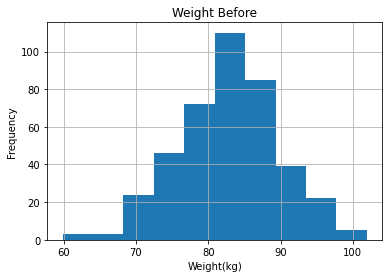

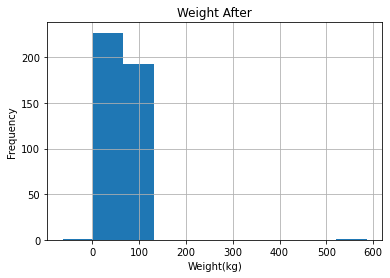

In [14]:
students_weights.hist(column =["Weight Before"]) #Plots histogram for Weights Before
plt.xlabel('Weight(kg)')                         #Labels x-axis
plt.ylabel('Frequency');                         #Labels y-axis 

students_weights.hist(column =["Weight After"])  #Plots histogram for Weights After
plt.xlabel('Weight(kg)')                         #Labels x-axis
plt.ylabel('Frequency')                          #Labels y-axis

<div class="alert alert-block alert-info">

***Concerns***
    
***1. Negative weights***
    
***2. Large unrealistic weights***
    
***3. A number of nulls***

## ***3.6. Clean Data***

<div class="alert alert-block alert-info">
    
***Cleaning Steps***

***1. Replace negative and unrealistic weights***
 
***2. Drop rows with nulls***
 
***3. Reset index***
 
***4. Write new csv file (for future use)***


In [39]:
students_weights2 = students_weights.replace([-63.540000, 586.40],[63.54, 58.64]).dropna().reset_index(drop=True) # Cleans data by fixing errors, dropping rows with null entries and resetting the index  
students_weights2.info()
students_weights2.shape
print(students_weights2)
students_weights2.to_csv('Clean Student Weights.csv') #Creates a csv file of clean data for future use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student Number  398 non-null    object 
 1   Weight Before   398 non-null    float64
 2   Weight After    398 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.5+ KB
    Student Number  Weight Before  Weight After
0             A011          88.24         60.02
1             A012          89.45         70.19
2             A013          96.73         71.20
3             A014          74.06         55.89
4             A015          82.61         65.52
5             A016          70.10         61.40
6             A017          78.98         76.71
7             A019          75.65         51.14
8             A020          68.27         55.20
9             A021          86.00         64.41
10            A022          79.94         62.53
11            A023         101.95         6

# ***4. Exploratory Data Analysis (Clean Data)***

## ***4.1. Numerical Summaries***

In [16]:
students_weights2.describe() #Calculates summmary statistics for the two variables 

,Weight Before,Weight After
count,398.000000,398.000000
mean,82.744095,65.446834
std,6.844801,8.462137
min,59.830000,35.320000
25%,78.225000,60.202500
50%,83.145000,65.495000
75%,87.165000,70.522500
max,101.950000,93.780000


In [17]:
students_weights2.mode(axis=0, numeric_only=True, dropna=True)  #Calculates mode for the two variables

,Weight Before,Weight After
0,70.35,54.49
1,73.12,59.55
2,74.88,60.06
3,75.05,61.40
4,75.56,62.08
5,75.65,62.53
6,76.55,63.49
7,77.66,63.70
8,78.85,64.38
9,78.98,66.48


## ***4.2. Visual Summaries***

Text(0, 0.5, 'Frequency')

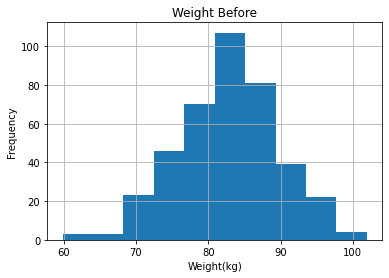

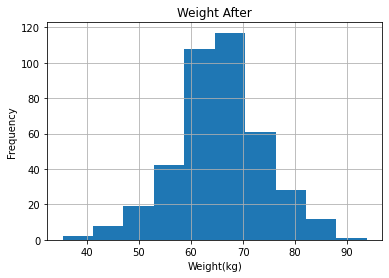

In [18]:
students_weights2.hist(column =["Weight Before"])  #Plots histogram for Weights Before
plt.xlabel('Weight(kg)')                           #Labels x-axis
plt.ylabel('Frequency')                            #Labels y-axis 

students_weights2.hist(column =["Weight After"])   #Plots histogram for Weights Before
plt.xlabel('Weight(kg)')                           #Labels x-axis
plt.ylabel('Frequency')                            #Labels y-axis 

Text(0, 0.5, 'Frequency')

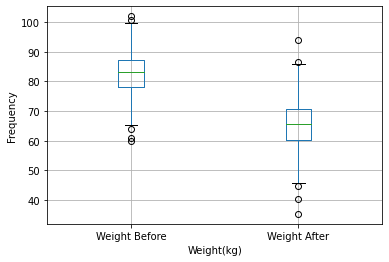

In [19]:
students_weights2.boxplot(column =["Weight Before","Weight After"]) #Plots boxplots for Weight Before & Weight After on same set of axis
plt.xlabel('Weight(kg)')                                            #Labels x-axis
plt.ylabel('Frequency')                                             #Labels y-axis

# ***5. Normality Checks***

## ***5.1. Analyse Histograms and Boxplots***

<div class="alert alert-block alert-info">
    
***"Weight before" and "Weight After" - approximately symmetrical due the symmetrical shape of histogram***

***"Weight before" and "Weight After" - approximately symmetrical due the median being near the middle of the plots***
 

## ***5.2. Normal Probability Plots***

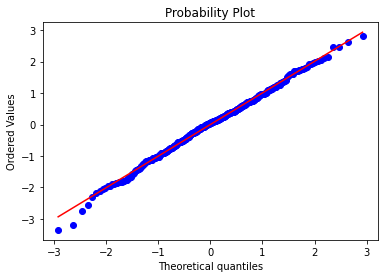

In [20]:
n_students_weights_before = stats.zscore( students_weights2['Weight Before']) #N-score transformation of Weight Before
stats.probplot(n_students_weights_before, dist='norm', plot=pylab)            #Calculates quantiles of sample data against those of a normal distribution
pylab.show()                                                                  #Displays the normal probaility plot

Analyse

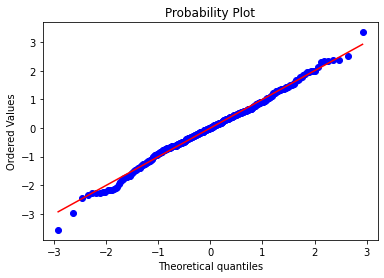

In [21]:
n_students_weights_after = stats.zscore( students_weights2['Weight After']) #N-score transformation of Weight After
stats.probplot(n_students_weights_after, dist = 'norm', plot=pylab)         #Calculates quantiles of sample data against those of a normal distribution
pylab.show()                                                                #Displays the normal probaility plot

<div class="alert alert-block alert-info">
 
 ***Normal probability plots generally show data that is approximatly normally distributed with minor departures at tail ends which are probably due to outliers observed in the boxplots.***


## ***5.3. Calculate Skewness***

In [30]:
from scipy.stats import kurtosis
from scipy.stats import skew
skew(students_weights2['Weight Before'], bias=False)

-0.14997926031453554

<div class="alert alert-block alert-info">
 
 ***"Weight before" - approximately symmetrical ( Skewness is between 0 & -0.5)***
 

In [23]:
skew(students_weights2['Weight After'], bias=False),kurtosis(students_weights2['Weight After'], bias=False)

(-0.1144397138311712, 0.5103076229496932)

<div class="alert alert-block alert-info">
 
 ***"Weight after" - approximately symmetrical ( Skewness is between 0 & -0.5)***
 

## ***5.4. Normality Test: Anderson Darling Test***

In [29]:
from scipy.stats import anderson
anderson(students_weights2['Weight Before'], dist ='norm') #Runs Anderson Darling's normality test for Weight Before

AndersonResult(statistic=0.3797351504190374, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<div class="alert alert-block alert-info">
Remember:

1. If (Test) Statistic > Critcal Value, Reject the null hypothesis (Note: Ho for A/D = data are normally distributed)
2. If (Test) Statistic < Critcal Value, Fail to reject the null hypothesis (Note: Ho for A/D = data are normally distributed)

***For all significance levels, (Test) Statistic < Critcal Values. Therefore, we fail to reject the nulll hypothesis that the data is normally distributed.***

In [25]:
anderson(students_weights2['Weight After'], dist ='norm') #Runs Anderson Darling's normality test for Weight After 

AndersonResult(statistic=0.7043586854524051, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<div class="alert alert-block alert-info">
Remember:

1. If (Test) Statistic > Critcal Value, Reject the null hypothesis (Note: Ho for A/D = data are normally distributed)
2. If (Test) Statistic < Critcal Value, Fail to reject the null hypothesis (Note: Ho for A/D = data are normally distributed)

***For significance levels 5% +, (Test) Statistic < Critcal Values. Therefore, we fail to reject the nulll hypothesis that the data is normally distributed (given a significance level of 5% or upwards).***

# ***6. Paired Sample T-Test***

In [26]:
stats.ttest_rel(students_weights2['Weight Before'], students_weights2['Weight After']).pvalue #Runs a paired two samples t test

3.0710987192210606e-128

<div class="alert alert-block alert-info">
Remember:

For paired two samples t-tests, Ho: Mean 1 = Mean 2 
P-value <0.05, Reject the null hypothesis
P-value >0.05, Fail to reject the null hypothesis

***Here, p-value < 0.05, therefore we reject the null hypothesis that the "weights before" are equal to "weights after". We can conclude that the exercise programme had an effect.*** 